# Season 6 - Script Analysis

![SegmentLocal](../Images/12.jpg "poster")

![SegmentLocal](../Images/11.gif "poster")

In [12]:
import os      
import pandas as pd
import plotly.graph_objects as go
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
folder = "../Data/Scripts/Season 6/"
txt_files = os.listdir(folder)   
print(txt_files)

['06x01 - Smoke Signals.txt', '06x02 - The Incident.txt', '06x03 - The Job Interview.txt', '06x04 - Maid of Honor.txt', '06x05 - The Premiere.txt', '06x06 - The Wingman.txt', '06x07 - Moira Rosé.txt', '06x08 - The Presidential Suite.txt', '06x09 - Rebound.txt', '06x10 - Sunrise, Sunset.txt', '06x11 - The Bachelor Party(Escape Room).txt', '06x12 - The Pitch.txt', '06x13 - Start Spreading the News.txt', '06x14 - Happy Ending.txt', "06x15 - Best Wishes, Warmest Regards - A Schitt's Creek Farewell.txt"]


In [4]:
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

Alexis: (Frustrated grunts) (Struggling grunts) Agh! Agh! Are you sure you don't want any help with that? I fit my high school best friend into a suitcase way smaller than this when we were crossing the border between Laos and Vietnam, so I'm pretty sure I can figure this out. Ooh, I can't wait to get to the Galapagos and like, breathe the sea air and get my Beach curls back. Yeah, you've mentioned that a couple times. Are you still trying to close that thing? - Agh! - Boys, it looks like I won't be able to see that wedding venue with you today, your mother's had a bit of a relapse. Take it the "Crows" movie is still shelved. I'm sorry, we've started looking at wedding venues and no one chose to tell me? Touring a wedding venue is an incredibly intimate thing and we wanted to keep it small. You invited Dad. Okay, I don't know what that's supposed to mean, Alexis. Moira: John, something's happening! Coming, Moira. Don't make any sudden moves. Okay, you should probably stay here. - No, y

In [5]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/schitts-creek.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: 06x01 - Smoke Signals
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x02 - The Incident
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x03 - The Job Interview
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x04 - Maid of Honor
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x05 - The Premiere
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x06 - The Wingman
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x07 - Moira Rosé
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x08 - The Presidential Suite
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: 06x09 - Rebound
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x10 - Sunrise, Sunset
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 06x11 - The Bachelor Party(Escape Room)
Sentiment Prediction: 0.0, Sentiment Ana

In [6]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in 06x01 - Smoke Signals Letter
['Sweetheart', 'Alexis', 'Officer', 'Moira: John', 'David', 'guys', 'Clive', 'partner', 'John', 'Lorna', 'God', 'Mom', 'someone', 'husband', 'someone', 'girls', 'no one', 'friend', 'Moira Rose', 'Rose', 'friend', 'someone', 'mother', 'David Rose', 'Boys', 'someone', 'Patrick', 'Johnny', 'someone', 'Somebody', 'Ted', 'Crows', 'nobody', 'Dad', 'Stevie', 'no one', 'girls', 'man', 'guys', 'person', 'babies', 'someone', 'ladies', 'kids', 'ex girlfriend', 'Cindy', 'balatron', 'couple', 'friend', 'winner', 'sister', 'people', 'two', 'everyone', 'person', 'bride', 'grooms', 'Officer', 'widower', 'I.', 'agent', 'Gentlemen', 'Gotta', 'husband', 'winner', 'cop', 'Al', 'Tipper', 'babies', 'Sean Penn', 'Mack', 'Johnathan', 'wood chipper', 'father', 'friend', 'Officer', 'people', 'Strand', 'brother', 'Kay', 'Kate Winslet', 'Billy Zane']

Number Entities Named in 06x01 - Smoke Signals Letter
['2700', 'one', 'one', 'one', 'one', '0', '8', '0', '8',

Person Entities Named in 06x05 - The Premiere Letter
['Alexis', 'Rose', 'Stevie', 'Moira', 'Jocelyn', 'movie expert', 'someone', 'David', 'Crows', 'publicist', 'guy', 'Megan', 'Dog', 'Janet', 'brother', 'anyone', 'Demi', 'maid', 'Ronnie', 'Clara Mandrake', 'crowening', 'Bob', 'Kay', 'bombshell attendee', 'audience members', 'kid', 'friend', 'no one', 'baby', 'baby', 'baby', 'baby', 'Crowd', 'Moira Rose', 'electrologist', 'baby', 'dad', 'wife', 'friend', 'baby', 'baby', 'Roland', 'Mother', 'publicist', 'publicist', 'dad', 'people', 'many', 'baby', 'driver', 'Crowd', 'people', 'dad', 'mayor', 'owner', 'dentist', 'people', 'Crowd', 'people', 'eons', 'anyone', 'actress', 'Zellweger', 'kid', 'kid', 'Johnny: Hey', 'people', 'people', 'People', 'mayo', 'caw', 'caw', 'caw', 'child', 'kids', 'mom', 'Man', 'Woman', 'everyone', 'few', 'Inhales', 'Reporter', 'Ladies', 'Carmine', 'Stella McCartney', 'Twyla', 'John', 'limo driver', 'everyone', 'gentlemen', 'Channing Tatum', 'pupils', 'business partn

Person Entities Named in 06x09 - Rebound Letter
['Lexi', 'David', 'Moira Rose', 'Artie', 'Arthur', 'Alexis', 'star witness', 'Jocelyn', 'Patrick', 'David', 'souls', 'one', 'Stevie', 'Ted', 'people', 'guys', 'one', 'guys', 'anybody', 'boys', 'fit', 'people', 'mum', 'witness', 'real estate agent', 'Davey', 'someone', 'Bob', 'folks', 'daughter', 'Johnny Rose', 'ex-wife', 'Grim Reaper', 'Johnathon Rose', 'Moira', 'Bell', 'fan', 'guys', 'man', 'Twyla', 'baby', 'mother', 'father', 'staff', 'grandkids', 'somebody', 'anybody', 'Protestors', 'Dad', 'dad', 'Dad', 'waitress', 'people', 'baby', 'baby', 'one', 'friends', 'customer', 'Roland', 'guy', 'man', 'people', 'daughter', 'grandad', 'fan', 'publicist', 'Dad', 'victim', 'parent', 'babe', 'guys', 'kids', 'couple', 'Woman', 'Cat Stevens', 'person', 'people', 'person', 'one', 'men', 'Bell', 'apothecary', 'sales staff', 'customers', 'Stone', 'all', 'people', 'gosh', 'students', 'people', 'Santa', 'John', 'friends', 'friends', 'Protesters', 'boys',

Person Entities Named in 06x13 - Start Spreading the News Letter
['Moira: David', 'darling', 'John', 'Bev', 'Alexis', 'husband', 'David', 'mom', 'people', 'someone', 'family', 'family', 'family', 'family', 'Veronica', 'executive', 'Patrick', 'Twy', 'few', 'Johnny', 'Kids', 'executive', 'Moira', 'biddy', 'framer', 'people', 'god', 'people', 'daughters', 'Rose', 'SCHITT', 'two', 'people', 'people', 'Little', 'salesman', 'Ruth', 'everybody', 'no one', 'guys', 'gal', 'staple', 'Dear Moira', 'squeal', 'guy', 'owners', 'mother', 'Woman', 'wolf pups', 'friends', 'pros', 'Bye', 'Joe', 'friends', 'son', 'Kids', 'people', 'Tippy', 'family', 'people', 'Kate winslet', 'Ronnie', 'anyone', 'spokesperson', 'friend', 'Most', 'Twyla', 'person']

Number Entities Named in 06x13 - Start Spreading the News Letter
['06', 'two', 'one', 'one', 'two', 'One', '92 million', '92 million', '2020', 'two', 'one', '13', 'Thirteen', 'two', 'one', '30', '3', '92 million', '31', 'one', 'one']

Consumer Entities Named in

In [7]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [9]:
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Season 6")])
fig.show()

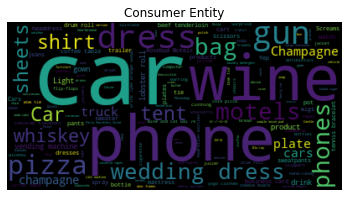

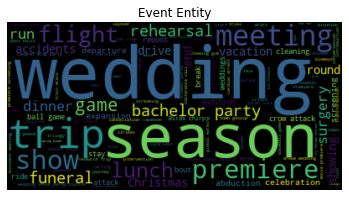

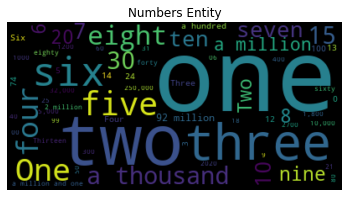

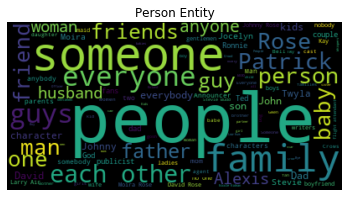

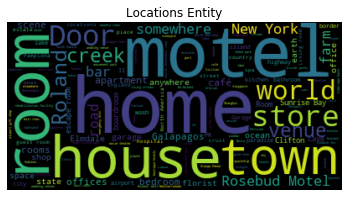

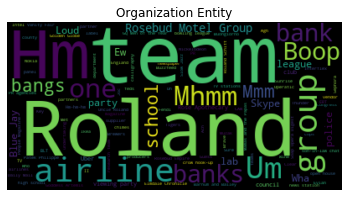

In [10]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: PUNCT
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: PUNCT
, tag: VERB
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: PRON
case: NOMINATIVE
person: SECOND
, tag: ADJ
, tag: PRON
case: NOMINATIVE
person: SECOND
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: ADV
, tag: VERB
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: PUNCT
, tag: PRON
case: NOMINATIVE
number: SINGULAR
person: FIRST
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: PRON
case: GENITIVE
number: SINGULAR
person: FIRST
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADV
number: SINGULAR
, tag: ADJ
, tag: ADP
, tag: DET
number: SINGULAR
, tag: ADV
, tag: PRON
case: NOMINATIVE
n

In [14]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter 06x02 - The Incident
/Arts & Entertainment


Classification of Letter 06x03 - The Job Interview
/Arts & Entertainment/Humor


Classification of Letter 06x04 - Maid of Honor
/Arts & Entertainment


Classification of Letter 06x05 - The Premiere
/Arts & Entertainment


Classification of Letter 06x06 - The Wingman
/Arts & Entertainment


Classification of Letter 06x07 - Moira Rosé
/Arts & Entertainment


Classification of Letter 06x07 - Moira Rosé
/Sports/Team Sports


Classification of Letter 06x08 - The Presidential Suite
/Arts & Entertainment


Classification of Letter 06x09 - Rebound
/Arts & Entertainment


Classification of Letter 06x10 - Sunrise, Sunset
/Arts & Entertainment


Classification of Letter 06x11 - The Bachelor Party(Escape Room)
/Arts & Entertainment


Classification of Letter 06x12 - The Pitch
/Arts & Entertainment


Classification of Letter 06x13 - Start Spreading the News
/Arts & Entertainment


Classification of Letter 06x14 - Happy Ending
/Ar

In [15]:
lang = 'english'
count = 10


for i in range(len(corpus)):
    new_string = corpus[i].replace('.', '. ').strip()
    lsa = LsaSummarizer(Stemmer(lang))
    lsa.stop_words = get_stop_words(lang)
    parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
    lsa_summary = lsa(parser.document, count)
    lsa_s = [str(sent) for sent in lsa_summary]
    summary = ' '.join(lsa_s)
    print('Summary of '+ txt_files[i][:-4])
    print(summary)
    print("")
    print("")
    

Summary of 06x01 - Smoke Signals
I fit my high school best friend into a suitcase way smaller than this when we were crossing the border between Laos and Vietnam, so I'm pretty sure I can figure this out. Ooh, I can't wait to get to the Galapagos and like, breathe the sea air and get my Beach curls back. - Boys, it looks like I won't be able to see that wedding venue with you today, your mother's had a bit of a relapse. Yeah, I left Stevie double-fisting drinks in a hot tub at the cabaret wrap party last night. - (Shocked scoff) - (Hard exhale) Honestly, David, if this is the kind of bride you're going to be, - I'm glad that I'm leaving. Does this not remind you of that wellness retreat we went to in Evian, right after Alexis ended things with Sean Penn? Bid adieu to our clothing and let the cool sting of the mineral water remind us that we were, in fact, alive and well. You could be hit by a Mack truck, or bopped on the head by a tiny piece of space debris! Well, since I wasn't suppos

Summary of 06x08 - The Presidential Suite
No, you get to drive him to the spa where he will indulge in a relaxing five minute scalp massage followed by some light sun. I'm reminded John of Shanghai and our Party Secretary Suite with its own aquarium, I'd lay in a claw foot tub watching the orcas. At Rose Video, he made me purchase the Blu-ray of my gritty feminist police drama, "Miranda Rights". Why don't I show you the county fair backdrop, I think a Ferris wheel would look so cute on a mouse pad. (Camera clicks repeatedly) Okay, here's what I'm thinking, we do that like three to four more times, and then we go on a romantic walk to your house and we like hang out there for a little bit. - No it's a great job, they wanna make me a permanent part of the research team in the Galapagos. You know that I can't make big decisions under pressure, that's how I ended up with a pixie cut at prom. - (Camera clicks) - (Car honks) - (Dog barks) (Bell over door jingles) (Music plays) Hey Alexis, I 

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (600) is lower than number of sentences (656). LSA algorithm may not work properly.



Summary of 06x11 - The Bachelor Party(Escape Room)
for tonight's festivities, I think we can all agree that putting me in charge of your joint bachelor party was a big mistake, right? And the fact that you guys wanted it to be the "bachelor party of your dreams" only added extra, totally unnecessary pressure - to the whole thing. It's just that a lot of people would have a really hard time saying no to that kind of work, especially when you spent the last three years talking about how badly you wanted to get outta this place. I've been, uh, reaching out to some old business contacts about potentially investing in a motel franchise, and I got a very positive response today from Mike Morrison, my former assistant, who's now a big venture capitalist. So, why don't you take a couple of Mom's happy pills and we can just put this whole situation on ice - until tomorrow? Now, this will all go a lot smoother if we just accept the fact that this is something we have to do, and that Patrick, for

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (534) is lower than number of sentences (563). LSA algorithm may not work properly.



Summary of 06x13 - Start Spreading the News
- (disappointed groans) [♪♪♪] *SCHITT'S CREEK* Season 06 Episode 13 Episode Title: "Start Spreading the News" Aired on: March 31, 2020 (dog barks in the distance) (sighs) is it just me, John, or does the air not have A particularly lovely redolence today. What says, "Patrick, you're gonna love New York" more: A gift card to Joe's pizza or tickets to "wicked"? And being here, getting to hear your stories Over the past few years, Even the scary ones, That makes me smile. Every now and again, Spending like a little bit of money on something really special, It might not buy you happiness, But it can definitely help make you smile. Oh, that photo of me sunbathing atop a giant VHS tape, was a staple of Times Square for a whole season. Well, technically, it didn't, But after the fourth time that we drove by it, And you commented that it reminded you Of Kate winslet's cottage from "the holiday". (low hum of chatter) (door shuts) (laughs) why have I n

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (457) is lower than number of sentences (486). LSA algorithm may not work properly.



Summary of 06x14 - Happy Ending
Well, thanks, Bob, but it's really hard to talk parking when we don't even know where we're holding the thing. All I did, was leave an envelope full of cash and a note that said to take very good care of you. Ah, everybody, I'd like to thank you all for coming out today, and uh helping to save David and Patrick's big day. It came with like a white, tulle, headdress, but I thought it overwhelmed the dress so I decided not to wear it. ♪ Take my heart and make it stronger ♪ ♪ You're simply the best ♪ ♪ Ohhh-ooooohh-ohhh ♪ ♪ Better than all the rest ♪ ♪ Ohhh-ooooohh-ohhh ♪ ♪ Better than anyone ♪ ♪ Ohhh-ooooohh-ohhh ♪ ♪ Anyone I ever met ♪ Is it me, or do they look like husband and wife? We are gathered here today to celebrate the love between two people, whose lives were ostensibly brought together by the fated flap of a butterfly wing. I'm gonna keep this very short because I think you already know that I would climb a thousand mountains for you. ♪ And I'm 